In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [61]:
df = pd.read_csv('../data/telcochurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
df.shape

df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [64]:
df['Churn'].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [65]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values again
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [66]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
df["TotalCharges"].isna().sum()

np.int64(0)

In [69]:
df.groupby('Churn')['tenure'].mean()


Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

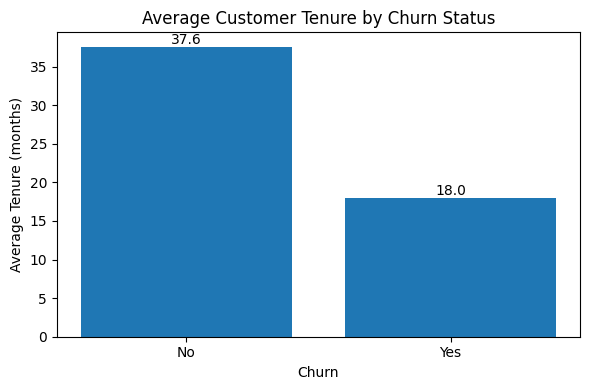

In [70]:
avg_tenure = df.groupby('Churn')['tenure'].mean().reset_index()
plt.figure(figsize=(6, 4))
plt.bar(avg_tenure['Churn'], avg_tenure['tenure'])
plt.title('Average Customer Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Average Tenure (months)')

for i, v in enumerate(avg_tenure['tenure']):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


C:\Users\muthu\AppData\Local\Temp\ipykernel_20172\3049666991.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TenureGroup')['Churn']


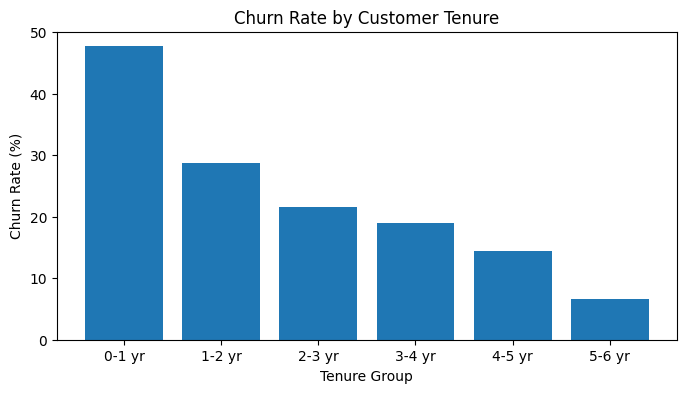

In [71]:
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels=['0-1 yr', '1-2 yr', '2-3 yr', '3-4 yr', '4-5 yr', '5-6 yr']
)

churn_by_tenure = (
    df.groupby('TenureGroup')['Churn']
      .apply(lambda x: (x == 'Yes').mean() * 100)
      .reset_index(name='ChurnRate')
)

plt.figure(figsize=(8, 4))
plt.bar(churn_by_tenure['TenureGroup'], churn_by_tenure['ChurnRate'])
plt.title('Churn Rate by Customer Tenure')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.show()


In [72]:
churn_by_tenure = (
    df.groupby('tenure')['Churn']
      .apply(lambda x: (x == 'Yes').mean() * 100)
      .reset_index(name='ChurnRate')
)


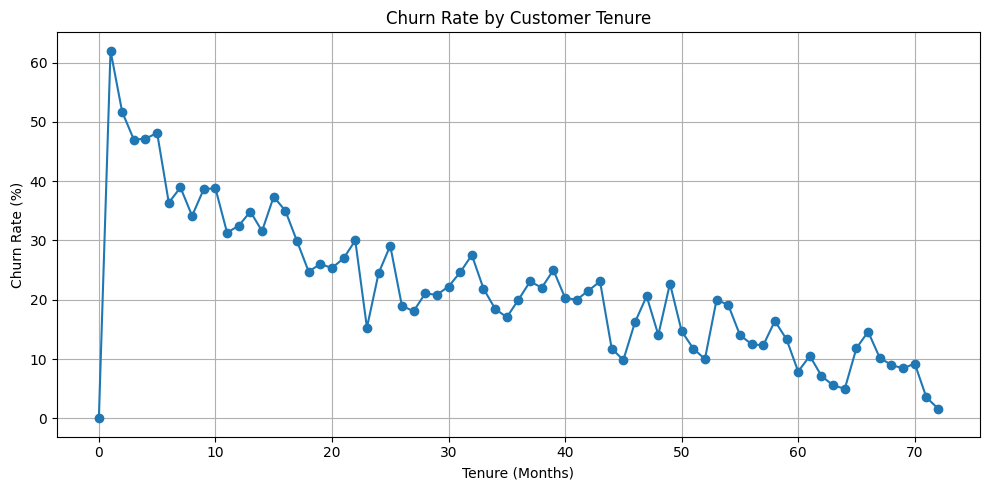

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(
    churn_by_tenure['tenure'],
    churn_by_tenure['ChurnRate'],
    marker='o'
)

plt.title('Churn Rate by Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [21]:
df.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [47]:
contract_churn = (
    df.groupby('Contract')['Churn']
      .apply(lambda x: (x == 'Yes').mean() * 100)
      .reset_index(name='ChurnRate')
)

contract_churn


,Contract,ChurnRate
0,Month-to-month,42.709677
1,One year,11.269518
2,Two year,2.831858


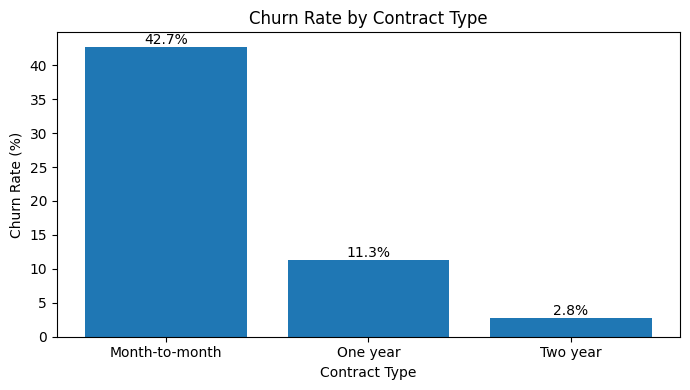

In [18]:
plt.figure(figsize=(7, 4))
plt.bar(contract_churn['Contract'], contract_churn['ChurnRate'])
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')

for i, v in enumerate(contract_churn['ChurnRate']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [75]:
monthly_churn = (
    df.groupby('Churn', as_index=False)
      .agg(Avg_MonthlyCharges=('MonthlyCharges', 'mean'))
)

monthly_churn


,Churn,Avg_MonthlyCharges
0,No,61.265124
1,Yes,74.441332


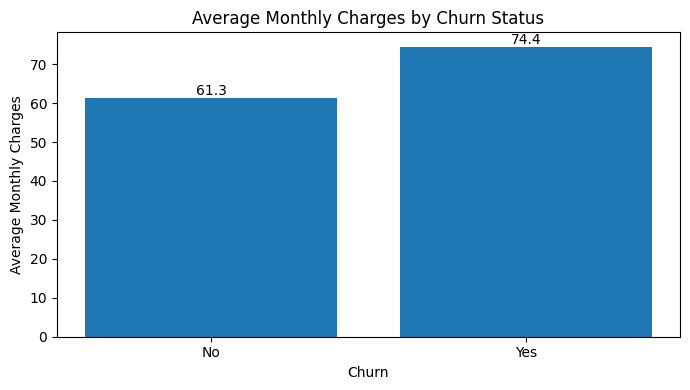

In [76]:
plt.figure(figsize=(7, 4))
plt.bar(
    monthly_churn['Churn'],
    monthly_churn['Avg_MonthlyCharges']
)
plt.title('Average Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Average Monthly Charges')

# Add value labels
for i, v in enumerate(monthly_churn['Avg_MonthlyCharges']):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [34]:
payment_churn = (
    df.groupby('PaymentMethod')['Churn']
      .apply(lambda x: (x == 'Yes').mean() * 100)
      .reset_index(name='ChurnRate')
      .sort_values(by='ChurnRate', ascending=False)
)

payment_churn


,PaymentMethod,ChurnRate
2,Electronic check,45.285412
3,Mailed check,19.106700
0,Bank transfer (automatic),16.709845
1,Credit card (automatic),15.243101


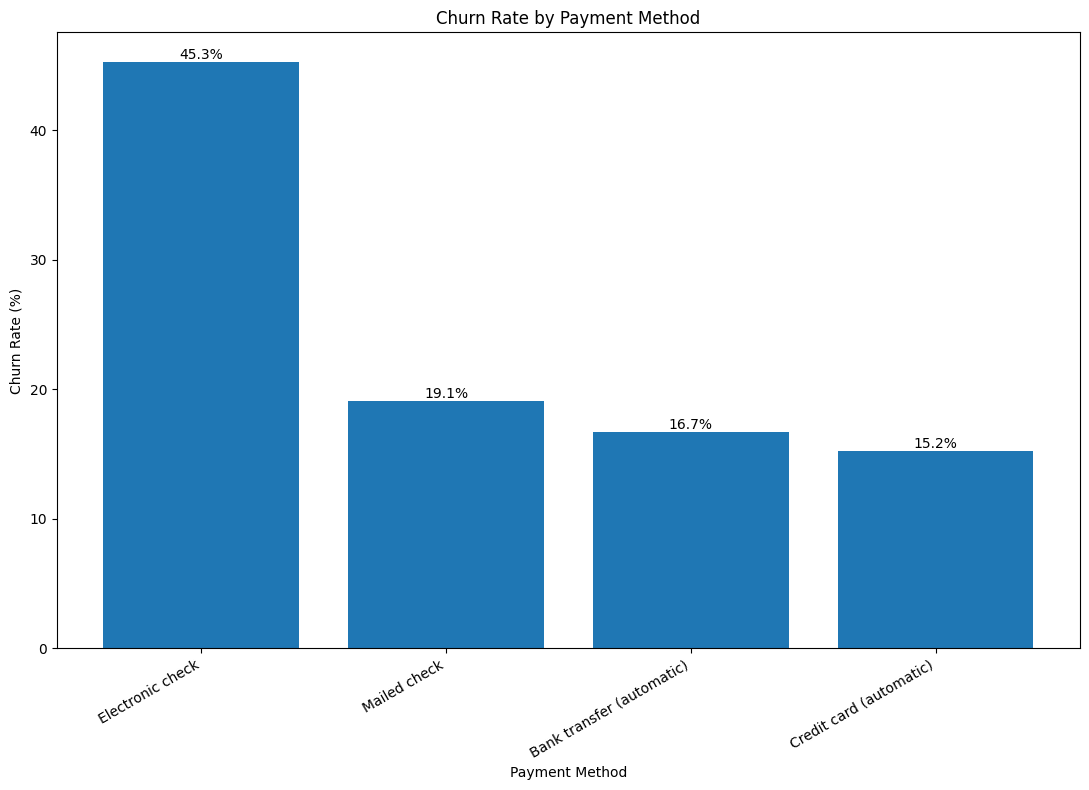

In [33]:
plt.figure(figsize=(11, 8))
plt.bar(
    payment_churn['PaymentMethod'],
    payment_churn['ChurnRate']
)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')

for i, v in enumerate(payment_churn['ChurnRate']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [41]:
gender_churn = (df.groupby('gender')['Churn']
                .apply(lambda x: (x == 'Yes').mean() * 100)
                .reset_index(name='ChurnRate')
                .sort_values(by='ChurnRate', ascending=False)
)
gender_churn

,gender,ChurnRate
0,Female,26.920872
1,Male,26.160338


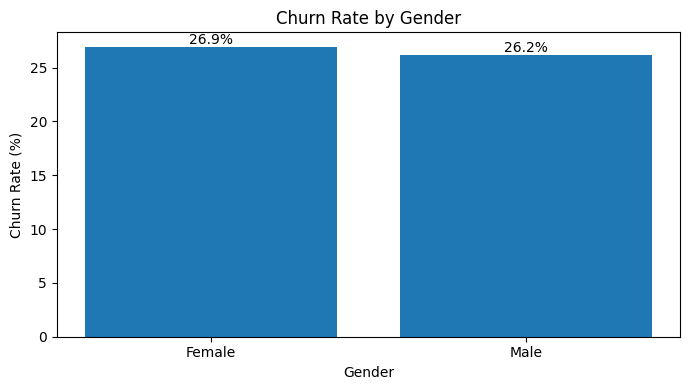

In [45]:
plt.figure(figsize=(7,4))
plt.bar(gender_churn['gender'], gender_churn['ChurnRate'])
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')

for i, v in enumerate(gender_churn['ChurnRate']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()
